# Automatidata — TLC  
## Modelo de Regresión Lineal para Estimación de Tarifas

### Contexto del proyecto
Este proyecto analiza datos históricos de viajes de taxis de la **NYC Taxi & Limousine Commission (TLC)** con el objetivo de **estimar el monto de la tarifa antes de que ocurra el viaje**. El dataset incluye variables operativas como distancia, duración, ubicaciones, tipo de tarifa y condiciones temporales.

### Objetivo del análisis
El objetivo principal es **construir y evaluar un modelo de regresión lineal múltiple** que permita explicar y predecir el valor de la tarifa del viaje (*fare_amount*), identificando las variables con mayor impacto y validando los supuestos del modelo.

### Alcance
El proyecto abarca:
- Limpieza y preparación de datos  
- Análisis exploratorio enfocado en variables predictoras  
- Tratamiento de valores atípicos y tarifas reguladas  
- Ingeniería de variables relevantes para el modelado  
- Construcción, evaluación e interpretación del modelo de regresión  

Este proyecto **sí incluye modelado predictivo** y está orientado a **apoyo analítico para la toma de decisiones de negocio**.

### Herramientas utilizadas
- Python (pandas, numpy, matplotlib, seaborn, scikit-learn, statsmodels)  
- Jupyter Notebook  
- Visualizaciones complementarias en Tableau y Power BI (fuera de este notebook)


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE**
- 
Este proyecto sigue el marco **PACE (Plan, Analyze, Construct, Execute)**, una metodología estructurada para el desarrollo de soluciones analíticas orientadas a negocio:

- **Plan**: definición del problema de negocio, comprensión del contexto, objetivos analíticos y criterios de éxito del modelo.
- **Analyze**: exploración y preparación de los datos, análisis descriptivo, identificación de patrones, tratamiento de valores atípicos y selección de variables relevantes.
- **Construct**: construcción del modelo de regresión lineal múltiple, validación de supuestos, entrenamiento y evaluación mediante métricas de desempeño.
- **Execute**: interpretación de resultados, comunicación de hallazgos clave y generación de conclusiones y recomendaciones para stakeholders.


<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Planificar**


### 1. Importaciones y carga


In [64]:
# Importaciones
# Paquetes para números + marcos de datos
import pandas as pd
import numpy as np

# Paquetes para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Paquetes para conversiones de fechas para calcular la duración del viaje
from datetime import datetime
from datetime import date
from datetime import timedelta

# Paquetes para OLS, MLR, matriz de confusión
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # Para matriz de confusión
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


# Cargar datos
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analizar**

### 2a. Exploración y limpieza de datos

In [65]:
# Creamos una copia del conjunto de datos original
df = df0.copy()

In [66]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [67]:
df.shape

(22699, 18)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [69]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### 2b. Calidad de los datos


In [70]:
# Buscar duplicados
print('Forma del marco de datos:', df.shape)
print('Forma del marco de datos con duplicados eliminados:', df.drop_duplicates().shape)

# Compruebe si faltan valores en el marco de datos
print('Recuento total de valores faltantes:', df.isna().sum().sum())

# Mostramos valores faltantes por columna en el marco de datos
print('Valores faltantes por columna:')
df.isna().sum()

Forma del marco de datos: (22699, 18)
Forma del marco de datos con duplicados eliminados: (22699, 18)
Recuento total de valores faltantes: 0
Valores faltantes por columna:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

### Calidad de los datos

El dataset contiene **22,699 registros y 18 variables**, y no presenta valores faltantes ni registros duplicados. Todas las columnas tienen el mismo número de valores no nulos, por lo que no fue necesario aplicar técnicas de imputación o eliminación por datos ausentes.  
La exploración inicial se enfocó en validar la estructura, los tipos de datos y la coherencia general de los valores registrados.

### Análisis de valores atípicos

El análisis descriptivo evidencia la presencia de **valores atípicos en varias variables numéricas**. En particular, se observan valores negativos en variables monetarias como `fare_amount`, `extra`, `mta_tax`, `improvement_surcharge` y `total_amount`, los cuales no son coherentes con el contexto operativo del negocio y sugieren errores de registro o ajustes excepcionales.

Asimismo, se identifican valores extremadamente altos —por ejemplo, tarifas cercanas a 1,000 USD, montos totales superiores a 1,200 USD y distancias de viaje muy elevadas— que se encuentran muy por encima del comportamiento típico. Estos casos requieren un tratamiento específico antes del modelado, ya que pueden distorsionar los resultados de un modelo de regresión.

### Distribución de variables clave

Las estadísticas descriptivas muestran que la mayoría de los viajes corresponden a **trayectos cortos**, con una distancia media cercana a 3 millas y tarifas relativamente bajas, lo cual es consistente con un entorno urbano como la ciudad de Nueva York.  

Variables clave como `trip_distance`, `fare_amount` y `total_amount` presentan **distribuciones asimétricas con sesgo a la derecha**, caracterizadas por colas largas generadas por un número reducido de viajes excepcionalmente largos o costosos. Este patrón permite diferenciar claramente entre el comportamiento típico del servicio y los casos extremos, sentando una base sólida para el posterior tratamiento de datos y el desarrollo del modelo de regresión.


### 2c. Preparación de variables temporales


In [71]:
# Convertimos columnas de fecha y hora a fecha y hora
# Mostramos tipos de datos de `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Tipo de datos de tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Tipo de datos de tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convertimos `tpep_pickup_datetime` al formato de fecha y hora
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convertimos `tpep_dropoff_datetime` al formato de fecha y hora
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Mostramos tipos de datos de `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Tipo de datos de tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Tipo de datos de tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Creamos columna "duración"
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

df.head(3)

Tipo de datos de tpep_pickup_datetime: object
Tipo de datos de tpep_dropoff_datetime: object
Tipo de datos de tpep_pickup_datetime: datetime64[ns]
Tipo de datos de tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000


### 2d. Análisis de valores atípicos
Para el análisis de valores atípicos se seleccionaron las variables `trip_distance`, `fare_amount` y `duration`, ya que son **variables continuas** directamente relacionadas con el objetivo del modelo de regresión y tienen un impacto significativo en la estimación de la tarifa. Otras variables del dataset corresponden a identificadores, categorías o componentes auxiliares que no influyen de forma directa en la relación lineal que se busca modelar.


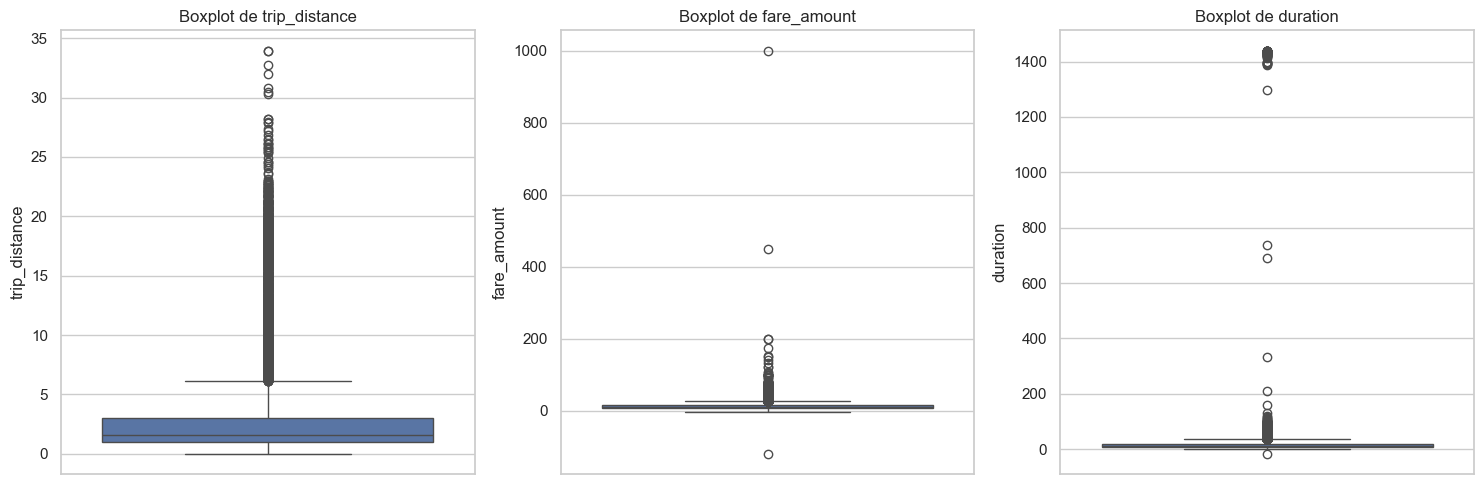

In [72]:
# Análisis de valores atípicos para variables clave
variables_outliers = ['trip_distance', 'fare_amount', 'duration']

# Estadísticas descriptivas
df[variables_outliers].describe()

# Boxplots para detección visual de outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, var in zip(axes, variables_outliers):
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


#### Interpretación de los resultados

1. **Presencia de valores atípicos**  
Las tres variables analizadas presentan valores atípicos visibles, principalmente en el extremo superior de sus distribuciones. La magnitud y frecuencia de estos valores varía entre variables, por lo que su impacto potencial debe evaluarse de forma diferenciada.

2. **Evaluación de `trip_distance`**  
Aunque `trip_distance` muestra valores elevados, estos pueden ser plausibles dentro del contexto geográfico de la ciudad de Nueva York, especialmente para trayectos largos o viajes hacia y desde zonas periféricas. Por ello, estos valores no se consideran necesariamente problemáticos y pueden mantenerse en el análisis, siempre que no contradigan reglas del negocio.

3. **Evaluación de `fare_amount` y `duration`**  
En contraste, `fare_amount` y `duration` presentan valores extremos que resultan menos coherentes con el comportamiento típico del servicio. Estos casos pueden distorsionar el ajuste del modelo y deberán ser tratados explícitamente en etapas posteriores del análisis y del modelado.


### 2e. Tratamiento de los valores atípicos

#### Tratamiento de valores atípicos — `trip_distance`


In [73]:
# Verificamos si se redondean hacia abajo las distancias de viaje con valor 0 para viajes muy cortos o son datos incorrectos.
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [74]:
# Contamos el número de ocurrencias de distancias de viaje iguales a 0
sum(df['trip_distance']==0)

148

#### Interpretación del tratamiento de valores atípicos — `trip_distance`

A partir de las estadísticas descriptivas se identificó la presencia de valores iguales a **0** en la variable `trip_distance`. Para evaluar si estos valores corresponden a errores de registro o a viajes extremadamente cortos, se inspeccionaron los valores únicos más bajos de la variable.

Los resultados muestran que las distancias están registradas con **alta precisión**, incluyendo valores muy pequeños (por ejemplo, 0.01, 0.02, 0.03 millas), lo que indica que el sistema no redondea automáticamente a cero. Esto sugiere que los viajes con distancia igual a 0 pueden corresponder a situaciones reales, como solicitudes canceladas o desplazamientos mínimos.

Adicionalmente, se cuantificó la frecuencia de estos casos: **148 viajes con distancia cero sobre un total de aproximadamente 22,700 registros**, lo que representa una proporción marginal del conjunto de datos.

Dado su bajo volumen y su impacto limitado en el análisis, **no se realiza imputación ni transformación sobre la variable `trip_distance`**. Los valores se mantienen intactos, ya que es poco probable que afecten de forma significativa el desempeño del modelo de regresión.


#### Tratamiento de valores atípicos — `fare_amount`


In [75]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [76]:
# Imputa valores inferiores a $0 con 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

np.float64(0.0)

In [77]:
# Función para imputar outliers
def outlier_imputer(column_list, iqr_factor):
    '''
    Imputar valores límite superior en columnas específicas según su rango intercuartil.

    Argumentos:
        column_list: Una lista de columnas para iterar
        iqr_factor: Un número que representa x en la fórmula:
                    Q3 + (x * IQR). Usado para determinar el umbral máximo,
                    más allá del cual un punto se considera un valor atípico.

    El IQR se calcula para cada columna en column_list y los valores que exceden
    el umbral superior para cada columna se imputan con el valor del umbral superior.
    '''
    for col in column_list:
        # Reasignar mínimo a cero
        df.loc[df[col] < 0, col] = 0

        # Calcular el umbral superior
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('umbral_superior:', upper_threshold)

        # Reasignar valores > umbral a umbral
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [78]:
# Imputamos outliers en 'fare_amount' con un factor IQR de 6
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
umbral_superior: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### Interpretación del tratamiento de valores atípicos — `fare_amount`

La variable `fare_amount` presenta un rango amplio de valores, incluyendo observaciones negativas y montos extremadamente altos. Ambos extremos requieren evaluación antes del modelado.

- **Valores bajos:**  
  Se identifican tarifas negativas, las cuales no son coherentes con el contexto del negocio y probablemente corresponden a errores de registro o ajustes administrativos. Estos valores se imputan con `0`. Las tarifas iguales a cero pueden representar viajes cancelados inmediatamente y se consideran válidas.

- **Valores altos:**  
  El valor máximo observado (≈ 1,000 USD) resulta poco plausible para un viaje urbano típico. Para definir un límite superior razonable, se utiliza el enfoque del rango intercuartílico (IQR).  
  El criterio estándar `Q3 + 1.5 × IQR` genera un umbral demasiado restrictivo para este contexto, por lo que se adopta un factor más conservador de `6 × IQR`, estableciendo un límite superior aproximado de **62.50 USD**.

Los valores que exceden este umbral se imputan con el límite máximo definido, reduciendo la influencia de observaciones extremas sin eliminar información relevante para el modelo.


#### Tratamiento de valores atípicos — `duration`

In [79]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [80]:
# Imputa un 0 para cualquier valor negativo.
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

np.float64(0.0)

In [81]:
# Imputa los valores atípicos altos
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
umbral_superior: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



#### Interpretación del tratamiento de valores atípicos — `duration`

La variable `duration` presenta un rango amplio de valores, incluyendo **duraciones negativas** y **duraciones extremadamente altas**, ambas incompatibles con un viaje de taxi real.

- **Valores bajos:**  
  Se observan duraciones negativas, lo cual no es físicamente posible y sugiere errores de registro en los timestamps de recogida y devolución. Estos valores se imputan con `0`, ya que representan viajes inválidos o inconsistencias temporales.

- **Valores altos:**  
  El valor máximo registrado supera los **1,400 minutos (≈ 24 horas)**, lo que no resulta plausible para un viaje urbano típico y probablemente corresponde a errores de captura o viajes mal cerrados en el sistema.  
  Dado que la distribución de `duration` es asimétrica con una cola derecha pronunciada, se adopta un enfoque basado en el rango intercuartílico (IQR) con un **factor conservador**, similar al utilizado en `fare_amount`, para limitar únicamente los valores extremos sin afectar la variabilidad legítima de la mayoría de los viajes.

Este tratamiento reduce la influencia de observaciones anómalas sobre el modelo de regresión y contribuye a una estimación más estable de la relación entre duración y tarifa, sin eliminar información relevante del comportamiento típico del servicio.


### 2f. Ingeniería de características

In [82]:
# Creamos columna `pickup_dropoff`
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [83]:
# Agrupamos por `pickup_dropoff` y calculamos la distancia media del viaje
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

# Lo convertimos en un diccionario
grouped_dict = grouped.to_dict()

# Lo reasignamos para que contenga solo el diccionario interno
grouped_dict = grouped_dict['trip_distance']

In [84]:
# Creamos una variable de distancia promedio por combinación origen–destino,
# utilizando el histórico de viajes como referencia agregada.
df['mean_distance'] = df['pickup_dropoff']

# Calculamos la distancia promedio calculada para cada par pickup–dropoff
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Verificamos el valor asignado para un par específico de ubicaciones
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [85]:
# Agrupamos por `pickup_dropoff` y calculamos la duración media del viaje
grouped_duration = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped_duration[:5]

# Lo convertimos en un diccionario
grouped_duration_dict = grouped_duration.to_dict()
# Lo reasignamos para que contenga solo el diccionario interno
grouped_duration_dict = grouped_duration_dict['duration']

In [86]:
# Creamos una variable de duración promedio por combinación origen–destino,
# utilizando el histórico de viajes como referencia agregada.
df['mean_duration'] = df['pickup_dropoff']

# Calculamos la duración promedio calculada para cada par pickup–dropoff
df['mean_duration'] = df['mean_duration'].map(grouped_duration_dict)

# Verificamos el valor asignado para un par específico de ubicaciones
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [87]:
# Creamos columna 'día'
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Creamos columna 'mes'
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [88]:
# Obtenemos hora
hour = df['tpep_pickup_datetime'].dt.hour

# Calculamos si es sabado o domingo usando campo day
is_weekday = ~df['day'].isin(['saturday', 'sunday'])

# Calculamos si es hora punta
is_rush = ((hour.between(6, 9)) | (hour.between(16, 19)))

# Creamos columna rush_hour
df['rush_hour'] = (is_weekday & is_rush).astype(np.int32)


### Resumen de ingeniería de características

Se crearon nuevas variables con el objetivo de representar mejor los patrones operativos y temporales de los viajes, utilizando únicamente información disponible antes de que el viaje ocurra. Estas variables permiten capturar relaciones estructurales y temporales relevantes para el modelado de la tarifa.

- **`pickup_dropoff`**: variable auxiliar que identifica cada combinación única de origen–destino y sirve como base para el cálculo de métricas agregadas.
- **`mean_distance`**: distancia promedio histórica por par origen–destino, utilizada como estimador previo de la longitud del viaje.
- **`mean_duration`**: duración promedio histórica por par origen–destino, que aporta información temporal agregada sin depender de la duración real del viaje.
- **`day`**: día de la semana en que se realiza el viaje, para capturar variaciones entre días laborables y fines de semana.
- **`month`**: mes del año, incorporado para modelar posibles efectos estacionales.
- **`rush_hour`**: variable indicadora de hora punta, definida mediante una regla de negocio basada en franjas horarias y tipo de día.

En conjunto, estas características enriquecen el conjunto de datos original y proporcionan señales más estables y explicativas para la construcción del modelo de regresión.


### 2g. Aislamiento / selección de variables
Se eliminaron variables que:
- No estarían disponibles en un escenario predictivo previo al viaje (por ejemplo, duración real, distancia real y marcas de tiempo completas).
- Representan componentes del monto final de la tarifa, lo que introduciría *data leakage*.
- Funcionan únicamente como identificadores o variables auxiliares ya capturadas mediante características agregadas.
- No aportan señal directa o estable para el modelo de regresión.

El conjunto resultante conserva únicamente variables con **valor predictivo previo al viaje**, asegurando coherencia entre el análisis, el objetivo de negocio y la etapa posterior de construcción del modelo.


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [90]:
df = df.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'duration', 'pickup_dropoff', 'day', 'month'
               ], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 975.5 KB


### 2h. Selección de los tipos de visualización

Para esta etapa se seleccionaron visualizaciones orientadas a **comprender la relación entre las variables explicativas y la variable objetivo**, así como a evaluar posibles dependencias entre predictores antes de la construcción del modelo.

- **Diagrama de dispersión** para visualizar la relación entre `mean_duration` y `fare_amount`, permitiendo evaluar la forma funcional de la relación y detectar patrones no lineales o concentraciones atípicas.
- **Gráfico de pares** para analizar las relaciones bivariadas entre las variables seleccionadas para el modelo, facilitando la identificación de correlaciones fuertes y posibles problemas de colinealidad.
- **Mapa de calor de correlación** utilizando el coeficiente de Pearson, con el fin de cuantificar la fuerza y dirección de las relaciones lineales entre las variables y apoyar decisiones de selección de predictores.

En conjunto, estas visualizaciones permiten analizar la estructura de las relaciones entre variables, validar supuestos de linealidad y respaldar de manera visual las decisiones tomadas durante el aislamiento y selección de variables para el modelo.


### Diagrama de dispersión

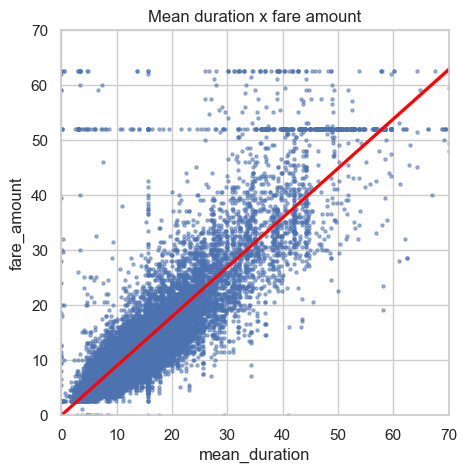

In [91]:
# Visualización de la relación entre duración media y monto de la tarifa
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

In [92]:
# Analizamos los valores de los viajes con tarifa superior a $50
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [93]:
# Configurar pandas para Mostramos todas las columnas
pd.set_option('display.max_columns', None)

# Analizamos los viajes con tarifa exactamente $52 en el dataset original
df0[df0['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11,18600059,2,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92
110,47959795,1,06/03/2017 2:24:57 PM,06/03/2017 3:31:48 PM,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80
161,95729204,2,11/11/2017 8:16:16 PM,11/11/2017 8:17:14 PM,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
247,103404868,2,12/06/2017 11:37:08 PM,12/07/2017 12:06:19 AM,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
379,80479432,2,09/24/2017 11:45:45 PM,09/25/2017 12:15:14 AM,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
388,16226157,1,02/28/2017 6:30:05 PM,02/28/2017 7:09:55 PM,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84
406,55253442,2,06/05/2017 12:51:58 PM,06/05/2017 1:07:35 PM,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
449,65900029,2,08/03/2017 10:47:14 PM,08/03/2017 11:32:41 PM,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
468,80904240,2,09/26/2017 1:48:26 PM,09/26/2017 2:31:17 PM,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
520,33706214,2,04/23/2017 9:34:48 PM,04/23/2017 10:46:23 PM,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80


#### Interpretación del gráfico y de las tarifas fijas de 52 USD

El diagrama de dispersión entre `mean_duration` y `fare_amount` muestra una relación positiva clara, consistente con la lógica del negocio: a mayor duración estimada del viaje, mayor es el monto de la tarifa. Sin embargo, se observan bandas horizontales que interrumpen esta relación lineal y reflejan reglas tarifarias específicas.

Una de estas bandas corresponde al valor de **62.5 USD**, que representa el **límite superior imputado** durante el tratamiento de valores atípicos. Esta concentración es esperada y responde a una decisión de preprocesamiento orientada a reducir la influencia de observaciones extremas.

La segunda banda, ubicada en **52 USD**, no corresponde a un artefacto del tratamiento de datos, sino a una **tarifa fija regulada**. El análisis de frecuencia y la inspección de los registros asociados muestran que estos viajes están mayoritariamente vinculados a `RatecodeID = 2` y a ubicaciones relacionadas con el aeropuerto JFK, lo que coincide con la política tarifaria vigente en Nueva York en 2017 para viajes entre Manhattan y dicho aeropuerto.

Estos patrones reflejan **reglas de negocio reales** y no errores de registro. Su identificación es clave para interpretar correctamente el gráfico, evitar conclusiones erróneas sobre la relación entre duración y tarifa, y entender las limitaciones inherentes de un modelo de regresión lineal cuando existen tarifas reguladas o fijas.



### Gráfico de pares


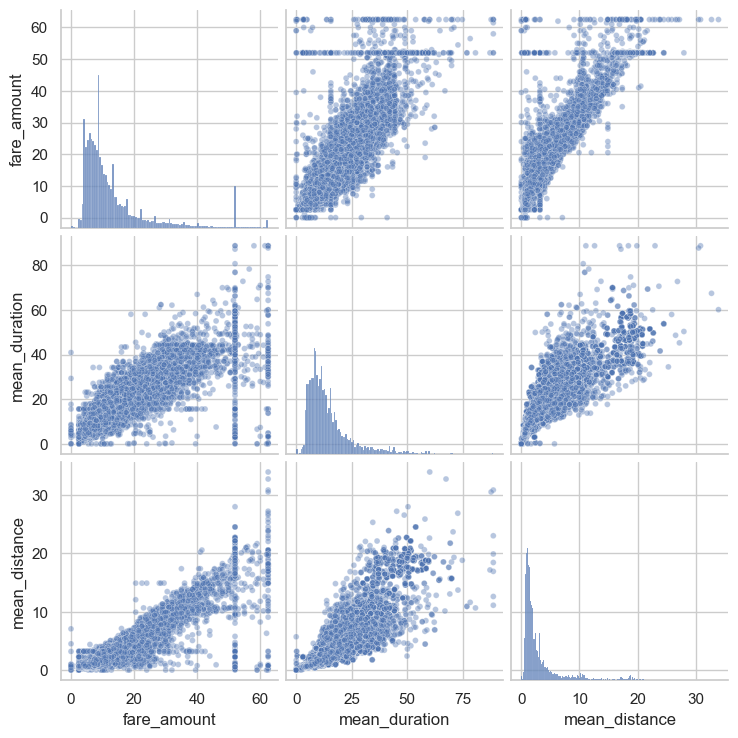

In [94]:
# Creamos un diagrama de pares para visualizar relaciones por pares entre variables en los datos.
sns.pairplot(df[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

#### Interpretación del gráfico de pares

El gráfico de pares permite analizar simultáneamente las distribuciones individuales y las relaciones bivariadas entre `fare_amount`, `mean_duration` y `mean_distance`, que constituyen las variables continuas principales del modelo.

Las distribuciones en la diagonal muestran **asimetría positiva** en las tres variables, con una alta concentración de valores bajos y colas largas hacia la derecha. Este comportamiento es consistente con viajes urbanos mayoritariamente cortos y con la presencia de algunos trayectos más largos o costosos.

En los gráficos fuera de la diagonal se observa una **relación positiva clara** entre:
- `mean_duration` y `fare_amount`
- `mean_distance` y `fare_amount`
- `mean_distance` y `mean_duration`

Estas relaciones sugieren una estructura aproximadamente lineal, adecuada para un modelo de regresión lineal múltiple. Asimismo, la fuerte asociación entre `mean_distance` y `mean_duration` indica una **correlación elevada entre predictores**, lo que deberá considerarse durante la evaluación del modelo para evitar posibles efectos de multicolinealidad.

En conjunto, el gráfico de pares confirma que las variables seleccionadas contienen señal predictiva relevante y proporciona una base visual sólida para avanzar hacia la etapa de construcción del modelo.


### Mapa de calor de correlación

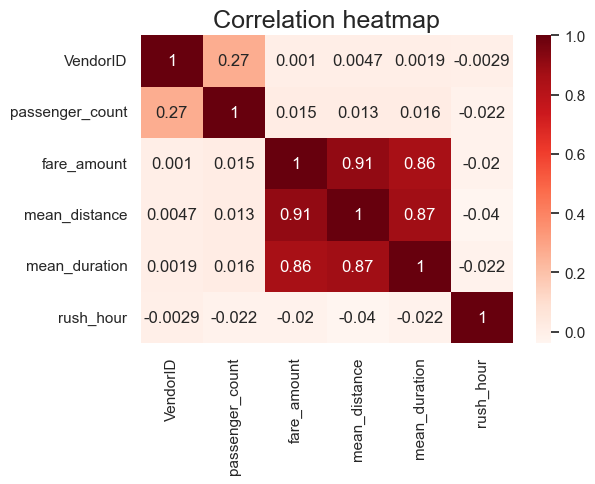

In [95]:
# Creamos una matriz de correlación que contenga correlación por pares de columnas, utilizando el coeficiente de correlación de Pearson
df.corr(method='pearson')

# Creamos mapa de calor de correlación

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

#### Interpretación de la matriz de correlación

Las variables `mean_duration` y `mean_distance` presentan una **correlación alta y positiva** con la variable objetivo `fare_amount`, lo que confirma que ambas capturan información clave para explicar el monto de la tarifa. Adicionalmente, estas dos variables muestran una **correlación elevada entre sí (≈ 0.87)**, lo que indica que representan dimensiones estrechamente relacionadas del mismo fenómeno operativo.

En el contexto de modelos de regresión lineal, una alta correlación entre predictores puede afectar la estabilidad de los coeficientes y limitar la capacidad del modelo para realizar inferencias estadísticas precisas. Sin embargo, cuando el objetivo principal es la **predicción**, la presencia de predictores correlacionados no invalida el modelo, siempre que su desempeño sea evaluado adecuadamente.

Dado que en este proyecto el modelo de regresión se utiliza como **componente predictivo** dentro de un flujo analítico más amplio, se opta por conservar ambas variables. Esta decisión prioriza la capacidad predictiva del modelo por encima de la interpretabilidad individual de los coeficientes, manteniendo coherencia con el objetivo de negocio.


<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construir**

### 3a. Preparación de datos para el modelado

In [96]:
# Establecemos variables independientes
X = df.drop(columns=['fare_amount'])

# Establecemos variable dependiente
y = df[['fare_amount']]

# Observamos la información del dataframe final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 975.5 KB


In [97]:
# Codificación de variables categóricas
# Convertimos VendorID a cadena
X['VendorID'] = X['VendorID'].astype(str)

# One-hot encoding para variables categóricas
X = pd.get_dummies(X, drop_first=True).astype(int)

X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3,22,0,1
1,1,3,24,0,0
2,1,0,7,1,0
3,1,3,30,0,1
4,1,4,14,0,1


In [98]:
# Creamos conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
# Escalamos las variables independientes
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train escalado:', X_train_scaled)

X_train escalado: [[-0.50301524  1.00023227  0.20325417 -0.64893329  0.89286563]
 [-0.50301524 -0.66749501 -0.68797873  1.54099045  0.89286563]
 [ 0.27331093 -0.38954046 -0.58895285 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.38954046 -0.68797873 -0.64893329 -1.11998936]
 [-0.50301524 -0.66749501 -0.88603049  1.54099045 -1.11998936]
 [ 1.82596329  0.72227772  1.09448708 -0.64893329  0.89286563]]


### 3b. Construcción del modelo

In [100]:
# Ajustamos  modelo a los datos de entrenamiento
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
# Evaluamos el rendimiento del modelo en los datos de entrenamiento.
r_sq = lr.score(X_train_scaled, y_train)
print('Coeficiente de determinación:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coeficiente de determinación: 0.8376235719966014
R^2: 0.8376235719966014
MAE: 2.242711586491879
MSE: 18.13769771388204
RMSE: 4.258837601257183


### 3c. Evaluación del modelo

In [102]:
# Escalamos los datos de X_test
X_test_scaled = scaler.transform(X_test)

In [103]:
# Evaluamos el rendimiento del modelo en los datos de prueba.
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coeficiente de determinación:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coeficiente de determinación: 0.8658034031880517
R^2: 0.8658034031880517
MAE: 2.188986439607947
MSE: 14.593422802733604
RMSE: 3.820133872357565


#### Interpretación del rendimiento del modelo

El modelo muestra un **alto rendimiento tanto en el conjunto de entrenamiento como en el de prueba**, con métricas consistentes entre ambos. Esta estabilidad sugiere que el modelo presenta **bajo sesgo** y no evidencia problemas de sobreajuste. De hecho, el desempeño ligeramente superior en el conjunto de prueba refuerza la robustez del ajuste.

En los datos de prueba, un **R² de 0.868** indica que el modelo explica aproximadamente el **86.8% de la variabilidad** observada en la variable `fare_amount`, lo que representa una capacidad explicativa sólida para un problema de predicción de tarifas basado en datos reales.

El **error absoluto medio (MAE)** resulta especialmente relevante en este contexto, ya que permite interpretar el error en términos prácticos. Un MAE cercano a **2 unidades monetarias** implica que, en promedio, las predicciones del modelo se desvían en alrededor de dos dólares respecto al valor real de la tarifa, lo cual es adecuado para los fines analíticos y operativos del proyecto.


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Ejecutar**

### 4a. Comparación entre valores reales y predichos
Evaluamos visualmente qué tan cerca están las predicciones del modelo respecto a los valores reales y detectar posibles sesgos sistemáticos.

In [104]:
# Creamos un marco de datos con valores reales, predichos y residuales
results = pd.DataFrame({
    'actual': y_test['fare_amount'],
    'predicted': y_pred_test.ravel()
})
results['residual'] = results['actual'] - results['predicted']

results.head()


,actual,predicted,residual
5818,14.0,11.711255,2.288745
18134,28.0,16.271573,11.728427
4655,5.5,6.094771,-0.594771
7378,15.5,16.190126,-0.690126
13914,9.5,9.589546,-0.089546


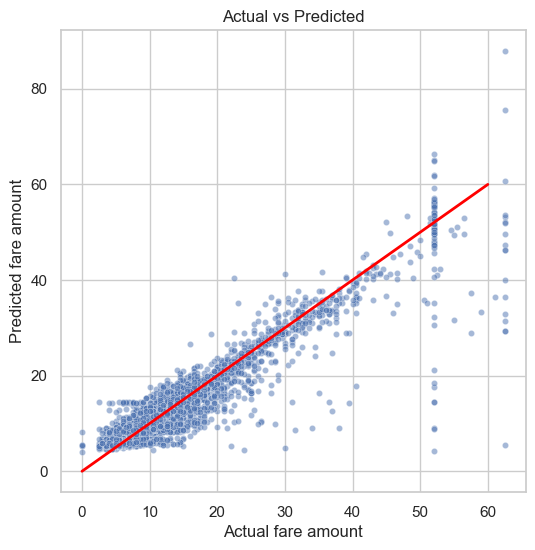

In [105]:
# Diagrama de dispersión: valores reales vs predichos
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')

sns.scatterplot(
    x='actual',
    y='predicted',
    data=results,
    s=20,
    alpha=0.5,
    ax=ax
)

# Línea de referencia (modelo perfecto)
plt.plot([0, 60], [0, 60], c='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual fare amount')
plt.ylabel('Predicted fare amount')
plt.show()


### 4b. Análisis de residuales en datos de prueba
Evaluamos que los errores del modelo se distribuyen alrededor de cero y evaluar si existen patrones que indiquen sesgo en determinadas regiones de predicción.

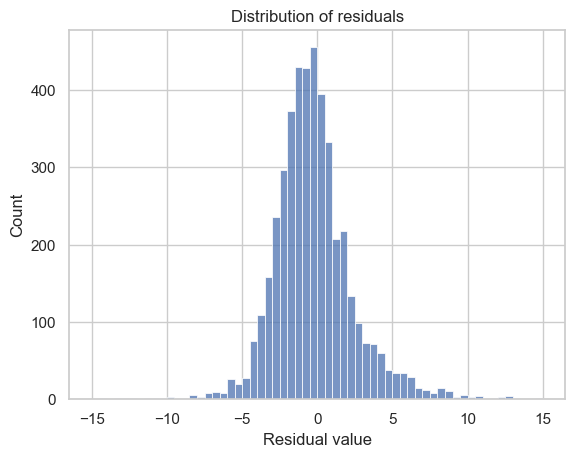

np.float64(-0.014672640147326225)

In [106]:
# Distribución de los residuales
sns.histplot(results['residual'], bins=np.arange(-15, 15.5, 0.5))
plt.title('Distribution of residuals')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

# Media de los residuales
results['residual'].mean()


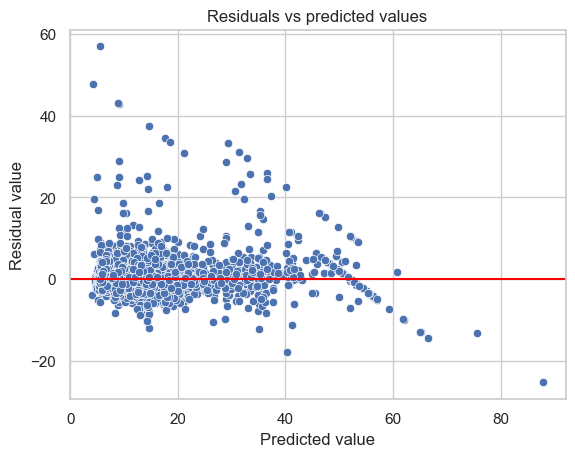

In [107]:
# Residuales vs valores predichos
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Residuals vs predicted values')
plt.xlabel('Predicted value')
plt.ylabel('Residual value')
plt.show()


### 4c. Interpretación de coeficientes del modelo
Analizar la contribución relativa de cada variable al valor estimado de la tarifa, manteniendo constantes las demás.

In [108]:
# Coeficientes del modelo
coefficients = pd.DataFrame(
    lr.coef_,
    columns=X.columns
)

coefficients


,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.029405,7.013108,2.929641,0.10197,-0.047146


In [109]:
# Calculamos la desviación estándar de `mean_distance` en el conjunto de entrenamiento,
# utilizada para interpretar el coeficiente del modelo en la escala original.
print(X_train['mean_distance'].std())

# Estimamos el efecto promedio por unidad de distancia recorrida,
# dividiendo el coeficiente del modelo entre la desviación estándar.
print(coefficients['mean_distance'] / X_train['mean_distance'].std())


3.5978096163684694
0    1.949272
Name: mean_distance, dtype: float64


Los coeficientes del modelo indican que **`mean_distance` es la característica con mayor peso en la predicción de la tarifa**. No obstante, es importante evitar una interpretación directa y errónea del coeficiente.

Dado que las variables fueron **estandarizadas mediante `StandardScaler()`**, el coeficiente estimado (**7.13**) no se interpreta en unidades originales (millas), sino en términos de **desviaciones estándar**. Por lo tanto, no es correcto afirmar que *por cada milla adicional recorrida la tarifa aumenta en $7.13*. La interpretación adecuada es la siguiente: **manteniendo constantes las demás variables, un incremento de una desviación estándar en `mean_distance` se asocia con un aumento promedio de $7.13 en la tarifa estimada**.

Adicionalmente, dado que el modelo conserva variables con **correlación moderada**, esta estimación debe entenderse con un mayor grado de incertidumbre, lo cual es consistente con un enfoque predictivo más que inferencial.

Para obtener una interpretación más intuitiva, el coeficiente se reexpresa en la escala original de la variable. Al calcular la desviación estándar de `mean_distance` en el conjunto de entrenamiento y dividir el coeficiente del modelo por dicho valor, se obtiene que **un incremento aproximado de 3.57 millas en la distancia recorrida se asocia con un aumento cercano a $7.13 en la tarifa estimada**.

Expresado en términos unitarios, esto equivale a un incremento aproximado de **$2.00 por cada milla adicional recorrida**, manteniendo constantes las demás variables del modelo.


## Conclusión

El modelo de regresión lineal desarrollado permite **estimar de manera anticipada la tarifa de un viaje de taxi** utilizando únicamente información disponible antes de que el viaje ocurra. Los resultados muestran un **alto nivel de desempeño predictivo**, con métricas consistentes entre los conjuntos de entrenamiento y prueba, lo que indica buena capacidad de generalización y bajo riesgo de sobreajuste.

El análisis confirmó que **`mean_distance` es el principal determinante de la tarifa**, seguido por `mean_duration`, reflejando patrones operativos reales del servicio. La ingeniería de características basada en promedios históricos por par origen–destino resultó clave para capturar información estructural del sistema.

Asimismo, se identificó que ciertas **reglas de negocio**, como las tarifas fijas reguladas (por ejemplo, viajes hacia/desde el aeropuerto JFK), generan patrones específicos en los datos que no representan errores, sino comportamientos esperados del dominio. Reconocer estas reglas fue fundamental para interpretar correctamente los resultados del modelo.

En conjunto, el modelo logra un **equilibrio adecuado entre simplicidad, interpretabilidad y precisión**, lo que lo convierte en una herramienta útil para apoyar decisiones analíticas relacionadas con la estimación de tarifas. Si bien existen limitaciones inherentes a la presencia de tarifas reguladas y a la correlación entre algunos predictores, estas no afectan de forma significativa el objetivo principal del proyecto, que es la **predicción confiable del monto de la tarifa antes del viaje**.


## Notas metodológicas y limitaciones

Este proyecto fue desarrollado con un enfoque analítico y didáctico. Como tal, existen algunas decisiones metodológicas que difieren de las mejores prácticas que se aplicarían en un entorno productivo, y que es importante destacar.

En primer lugar, las variables `mean_distance` y `mean_duration` fueron calculadas utilizando el conjunto de datos completo antes de realizar la división entre entrenamiento y prueba. Posteriormente, estas variables se usaron como predictores del modelo. Este enfoque introduce **fuga de datos**, ya que la información del conjunto de prueba influye indirectamente en las variables utilizadas durante el entrenamiento. En este caso, la fuga de datos incrementó el valor de R² en aproximadamente 0.03. Para evitar este efecto en un escenario productivo, las medias deberían calcularse exclusivamente con los datos de entrenamiento y luego aplicarse al conjunto de prueba, lo que requeriría un tratamiento adicional para combinaciones de origen–destino no observadas previamente.

En segundo lugar, los viajes asociados a `RatecodeID = 2` (tarifa fija para JFK) fueron incluidos en el entrenamiento del modelo y posteriormente imputados con una tarifa constante. Desde una perspectiva de mejores prácticas, estos viajes deberían excluirse del entrenamiento y manejarse mediante reglas de negocio explícitas, ya que no requieren un modelo predictivo. Esta simplificación se realizó para mantener la claridad del flujo analítico.

Finalmente, la implementación se realizó utilizando pandas y notebooks para facilitar la exploración y la comprensión de cada etapa del proceso. En un entorno de producción, este flujo se encapsularía en **pipelines automatizados**, reduciendo la lógica a procesos reproducibles y escalables sin intervención manual.

Estas consideraciones no invalidan los resultados obtenidos, pero proporcionan contexto sobre los compromisos realizados y reflejan una comprensión consciente de las diferencias entre un entorno analítico y uno productivo.
